repo: https://github.com/moonman312/visable-film

# About The Data

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories 

0=Angry <br />
1=Disgust<br />
2=Fear<br />
3=Happy<br />
4=Sad<br />
5=Surprise<br />
6=Neutral<br />

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# load the data
data = pd.read_csv(r'emotion.csv')

In [4]:
# extracting the target variable and put the data in a numpy matrix
target = data['emotion']
pics = data['pixels']
X = np.zeros((len(pics), 48**2))
for i, pic in enumerate(pics):
    X[i,:] = np.asarray(pic.split(' '), dtype = np.float32)

In [5]:
# shape of data
print('shape of data:\n')
print('number of data points: {}'.format(X.shape[0]))
print('number of features: {}'.format(X.shape[1]))

shape of data:

number of data points: 28709
number of features: 2304


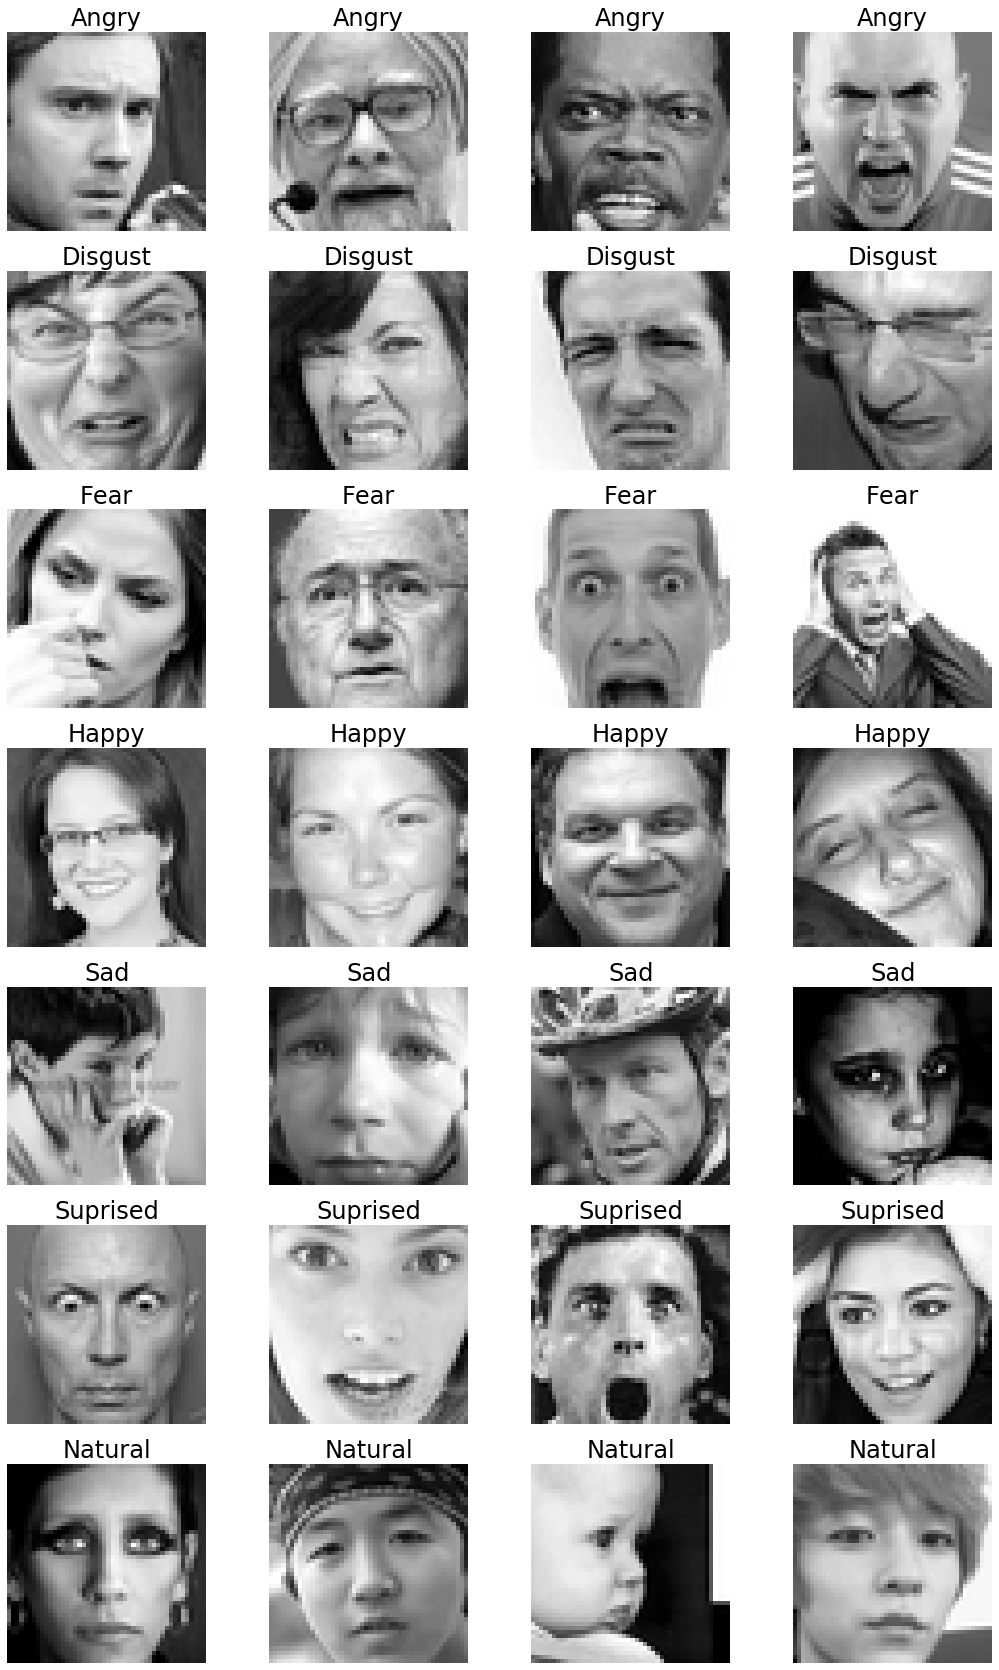

In [6]:
# show some examples of each emotion
emotion_map = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Suprised', 6:'Natural'}

f, a = plt.subplots(7,4,figsize = (18,30))
for emotion in range(7):
    for example in range(4):
        
        # find examples of emotion
        examples = X[target == emotion]
        
        a[emotion, example].imshow(examples[example,:].reshape((48,48)), cmap='gray')
        a[emotion, example].set_title(emotion_map[emotion], fontsize = 24)
        a[emotion, example].axis('off')

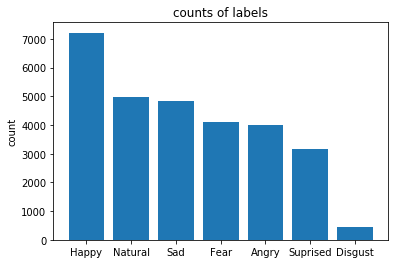

In [7]:
# is the dataset balanced?
counts = target.value_counts()
{0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Suprised', 6:'Natural'}
names = ['Happy','Natural','Sad','Fear','Angry','Suprised','Disgust']

plt.bar(names, counts)
plt.title('counts of labels')
plt.ylabel('count');

**our dataset is not balanced. we can definitely remove disgust, which is not really relevant to what we are trying to do. another option is to turn this into a binary classification - is the person feeling a positive or a negative emotion? this is also a good idea since the google text sentiment analysis API also returns only positive/negative labels back**

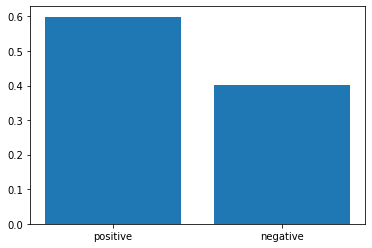

In [13]:
# lets comapre the number of positive/natural labels and negative ones
positive = counts[3] / (counts[3] + counts[4])
negative = 1 - positive

plt.bar(['positive','negative'],[positive, negative]);

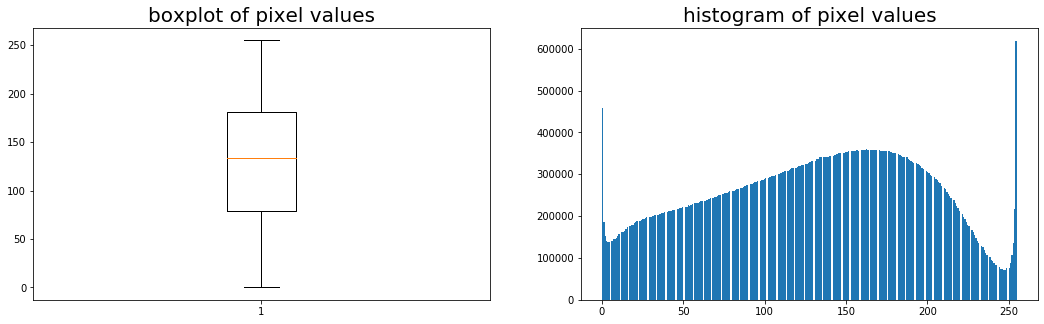

In [9]:
# statistical properties
all_pixels = X.flatten()
f, a = plt.subplots(1,2,figsize=(18,5))
a[1].hist(all_pixels, 300)
a[1].set_title('histogram of pixel values', fontsize=20)
a[0].boxplot(all_pixels)
a[0].set_title('boxplot of pixel values', fontsize=20);

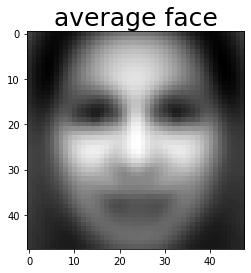

In [10]:
# mean image
mean = np.mean(X, axis=0)
plt.imshow(mean.reshape(48,48), cmap='gray')
plt.title('average face', fontsize=25);

**this is the way faces should be perceived by the camera in the first version of the product. afterwards, this will be the bounding box that will bre taken of the face**

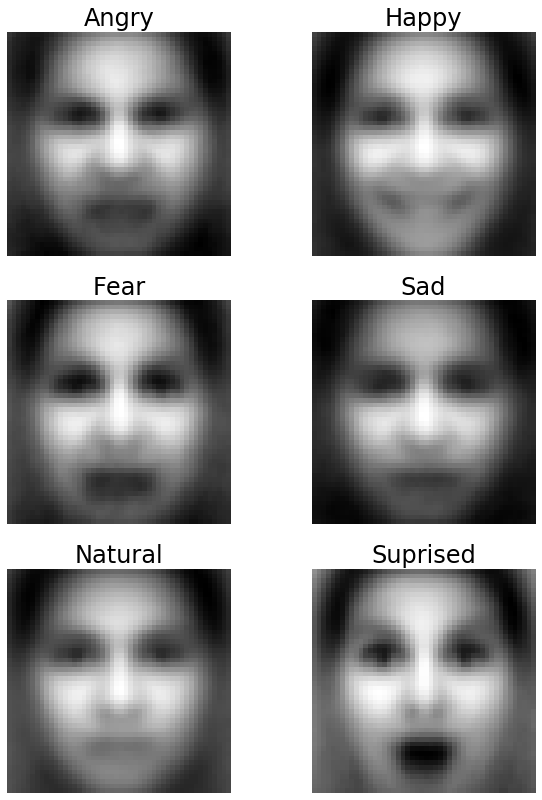

In [11]:
# mean face by emotion
f, a = plt.subplots(3,2,figsize=(10,14))
for emotion, loc in zip([0,2,3,4,5,6], [[0,0],[1,0],[0,1],[1,1],[2,1],[2,0]]):
    
    # get mean emotion
    examples = X[target == emotion]
    mean = np.mean(examples, axis=0).reshape(48,48)
    a[loc[0],loc[1]].imshow(mean, cmap='gray')
    a[loc[0],loc[1]].set_title(emotion_map[emotion], fontsize = 24)
    a[loc[0],loc[1]].axis('off')

# CNN for emotion detection - initial model


we will use a vanilla CNN for the initial pruduct. it will have 8 conv layers, 4 maxpool layers and a single fully connected layer, that wiill output a single probabilty of being sad. 
after a lot of trail and error, we concluded that it is beneficial to reduce the problem (and accordingly, the dataset) to only happy and sad faces. this makes sense, since our main goal is to target depressed individuals and help them deal with the hazareds of going online. 

it will be compared to a baseline model that will alwayes guess that majority class - and thus will achive accuracy of 60%

In [7]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 16)        160       
_________________________________________________________________
dropout_25 (Dropout)         (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
dropout_26 (Dropout)         (None, 48, 48, 16)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
dropout_27 (Dropout)         (None, 24, 24, 16)       

In [ ]:
# set up a CNN
batch_size = 32
epochs = 30

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(48,48,1)))
model.add(Dropout(0.15))
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2),padding='valid'))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

seqModel = model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test))

## result
this CNN achived test accuracy of 88% - much better than a naive baseline model.  

# Getting pictures of the user from the webcam

This module opens the webcam independently in a greyscale colors and uses the
Haar Cascade Object Detection Face to detect the face in the frame.
The detected face is marked real-time by a rectangle frame, and subsequently it captures 50 frames with
150msec delay between each frame while saving the original frames, cropping the face from the frame,
resize it to (48,48) and save it in an array of cropped_faces.

After capturing all frames the array shape is the following: (48,48,i<=50), and this array will be
given as an input for the model to predict the face expression.
Here i stands for the number of captured faces from the frames.
i can be less than 50 since we take into account that in some frames whether no face
was detected or more than one face were detected.
For convenience, some show functions were added to the code in order to show the face detection
and the functionality of the code.

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# defining webcam as the video (0 represent the default option which is the web camera).
cap = cv2.VideoCapture(0)
cropped_faces = []
i=0

while i<50:
    # Read the frame
    _, img = cap.read()

    # take 50 frames with 150 msec delay between each frame
    for i in range(50):
        _, frame = cap.read()
        #convert the frame to gray scale
        gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #detect the faces in the picture using the classifier face_cascade
        faces_rects = face_cascade.detectMultiScale(gray_image, 1.1, 4)
        # print how many faces were found in the current frame
        print(f'frame{i} found: ', len(faces_rects))
        # writing the frames as a grey scale colored
        cv2.imwrite(f'camera_frame{i}.png', gray_image)
        #wait 150 msec
        cv2.waitKey(150)

        # check if no faces were detected / more than one face was dete
        if len(faces_rects) != 1:
            #(the following line will be changed by logger)
            #if the condition is fulfilled, instead of adding picture to the croped_faces list,
            # add the following string indicating the number of the frame not found
            cropped_faces.append(f"face in frame {i} not recognized/more than one face were found")
            print("face not fount")

        #otherwise
        else:
             # Draw the rectangle around each face
            for (x, y, w, h) in faces_rects:
                cv2.rectangle(gray_image, (x, y), (x + w, y + h), (255, 0, 0), 2)
                # Display
                cv2.imshow('img', gray_image)
                #add the cropped face from the current gray image to a list of cropped faces
                cropped_faces.append(gray_image[y:y + h, x:x + w])
    #setting the i to 50 in order to exit the loop after capturing 50 frames
    i = 50
#releasing the camera
cap.release()

#resize all pictures to (48,48) and put them inside a list
resized_arr=[]
for face in cropped_faces:
    if type(face) is not str:
        resized_face = cv2.resize(src=face, dsize=(48,48), interpolation=cv2.INTER_CUBIC)
        #showing the resized picture
        plt.imshow(resized_face)
        resized_arr.append(resized_face)
        plt.show()

# Sending text to go through sentiment analysis using google NLP API

here we have the function that excepts the text, sends it to google NLP API and gets a sentiment analysis score. 
The score of a document's sentiment indicates the overall emotion of a document.
The magnitude of a document's sentiment indicates how much emotional content is present within the document,
and this value is often proportional to the length of the document. this is 

In [ ]:
# Setting the environmental variable for google libraries
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = GOOGLE_APPLICATION_CREDENTIALS_PATH


class TextSentiment:
    # type = enums.Document.Type.HTML
    _type = enums.Document.PLAIN_TEXT

    def __init__(self):
        self.client = language.LanguageServiceClient()

    def parse_html(self, source_text):
        """
        TO DO
        :param source_text: The text content to analyze
        :type source_text:
        :return:
        :rtype:
        """
        soup = BeautifulSoup(source_text)  # TO DO check input form
        return soup.text

    def analyze(self, text):
        """
        Function gets text, analyze it and returns it's sentiment score and magnitude score.
        :param text: The text content to analyze
        :type text: string
        :return: Returns sentiment score and  magnitude score.
        :rtype: tuple(float, float)
        """
        # text prep
        document = types.Document(content=text, type=self._type)
        # Detects the sentiment of the text
        annotations = self.client.analyze_sentiment(document=document).document_sentiment
        sentiment_score = annotations.document_sentiment.score
        magnitude = annotations.document_sentiment.magnitude
        return sentiment_score, magnitude

# Using a chrome extension as the UI of the product while surfing the web.

while there are not python files, so they can not be presented here, here is a summary of the development status: the chrome extension runs and knows how to send HTML content of the current webpage to the API and receive the sentiment analysis form it. for the rest of the code, check the repo.

# NEXT STEPS
1. integrate all parts of the project and build a server to control the flow.

 

The flow:

The server continuously receives sentiment score of user’s face, the content of the webpage from the chrome extension (client), calculates sentiment score of the content, and returns the response to the Chrome extension whether or not to pop-up a warning message.

![flow.jpg](flow.jpg)

2. imporve the CNN - we would like to try transfer learning and more sophisticated architectures.
3. We want to improve the model by sending for semantic analysis only the relevant content of the web page. This is especially important for infinite scroll web pages.